In [1]:
#@title Import Library
import numpy as np
from numpy import (sin, cos, pi)
import matplotlib.pyplot as plt
from scipy.fftpack import (fft, fftfreq)
from scipy.signal import windows

print('Imported successfully')

Imported successfully


#**Generate Signal & Display**

Section-1	DC : 2
Section-2	DC : 0, AC-Peak : 5
Section-3	DC : 7, AC-Peak : 4
Section-4	DC : 0, AC-Peak : 5
Total points : 1024


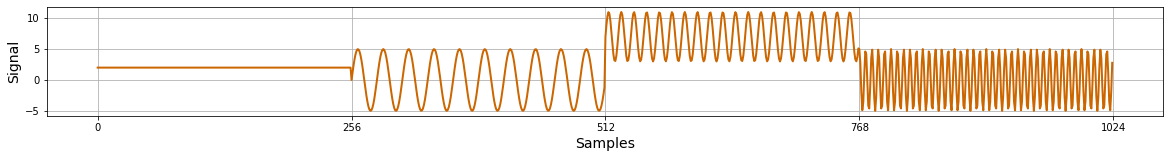

In [2]:
#@title Run Section
x=np.empty((0,1))

N=256
# DC signal
dc=2
val=dc*np.ones((N,1))
x=np.append(x,val,axis=0)
print('Section-1\tDC : {}'.format(dc))

# Sine wave 
m=10
A=5
n=np.arange(0,N)
val=A*sin(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-2\tDC : {}, AC-Peak : {}'.format(0,A))

# Sine wave + DC
m=20
dc=7
A=4
n=np.arange(0,N)
val=dc+A*sin(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-3\tDC : {}, AC-Peak : {}'.format(dc,A))

# Cosine wave
m=40
A=5
n=np.arange(0,N)
val=A*cos(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-4\tDC : {}, AC-Peak : {}'.format(0,A))

print('Total points : {}'.format(x.size))

plt.figure(figsize=(20,2))
plt.plot(x,color=[0.8,0.4,0],lw=2)
plt.xticks(ticks=np.arange(0,x.size+1,N))
plt.ylabel('Signal',fontsize=14)
plt.xlabel('Samples',fontsize=14)
plt.grid()
plt.show()

#**Full Signal Spectrum Analysis**

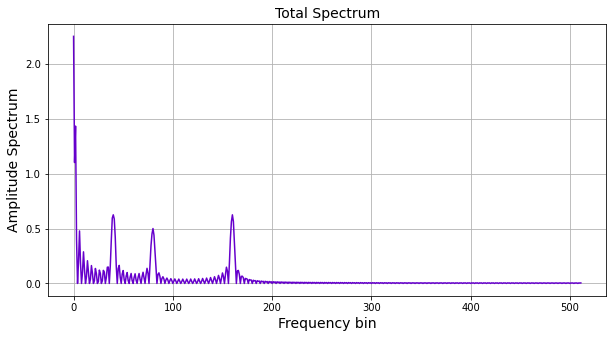

In [3]:
#@title Run section
Nfft=x.size

X=fft(x,axis=0)
X=X/Nfft
F=fftfreq(Nfft)

F_disp_id=np.where(F>=0)
plt.figure(figsize=(10,5))
plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlabel('Frequency bin',fontsize=14)
plt.title('Total Spectrum',fontsize=14)
plt.grid()

plt.show()

#**Sectional Signal Spectrum**

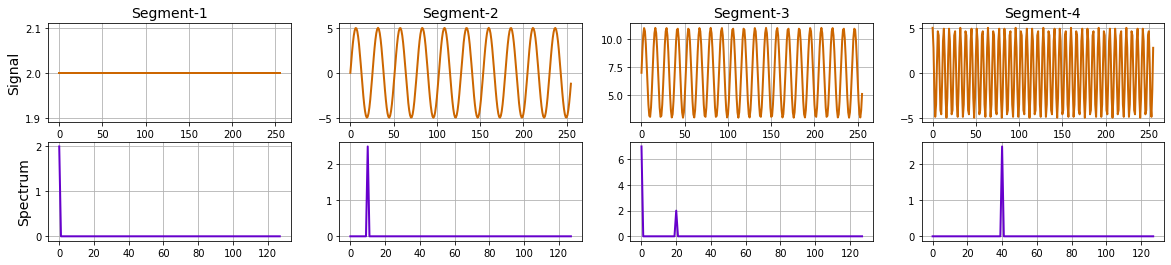

In [4]:
#@title Run Section
segments=int(x.size/N)
Nfft=N
F=fftfreq(Nfft)
F_disp_id=np.where(F>=0)

plt.figure(figsize=(20,4))
startId=0
endId=startId+N
for i in range(segments):
    data=x[startId:endId,0]

    DATA=fft(data,axis=0)
    DATA=DATA/Nfft

    plt.subplot(2,segments,i+1)
    plt.plot(data,lw=2,color=[0.8,0.4,0])
    plt.grid()
    if i==0:
        plt.ylabel('Signal',fontsize=14)
    plt.title('Segment-'+str(i+1),fontsize=14)


    plt.subplot(2,segments,i+1+segments)
    plt.plot(np.absolute(DATA[F_disp_id]),lw=2,color=[0.4,0,0.8])
    plt.grid()
    if i==0:
        plt.ylabel('Spectrum',fontsize=14)
    
    
    # update id:
    startId=endId
    endId=startId+N

plt.show()